# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [2]:
df =  pd.read_csv('Pokemon.csv')

df.columns = df.columns.str.upper().str.replace('_', '') # replace _ with space

df = df.set_index('NAME') # set the name field as the index

df.index = df.index.str.replace(".*(?=Mega)", "") # remove the word Mega from Mega Evolutions

df=df.drop(['#'],axis=1)                          # drop the # column

df['TYPE 2'].fillna(df['TYPE 1'], inplace=True)   # fill blank Type 2 with existing Type 1

In [3]:
df.columns

Index(['TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK',
       'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')

In [4]:
df.groupby(['TYPE 1'])['TYPE 2'].count().reset_index(name='count').sort_values(['count'], ascending=False)


,TYPE 1,count
17,Water,112
12,Normal,98
9,Grass,70
0,Bug,69
14,Psychic,57
6,Fire,52
3,Electric,44
15,Rock,44
8,Ghost,32
10,Ground,32


# Data Analysis Visualizations

## Attack stat histogram

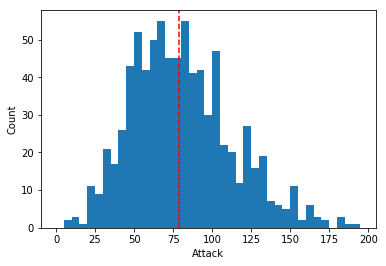

In [5]:
bins=range(0,200,5)
plt.hist(df["ATTACK"],bins,histtype="bar",rwidth=1.2) # histogram
plt.xlabel('Attack')
plt.ylabel('Count')
plt.plot()
plt.axvline(df['ATTACK'].mean(),linestyle='dashed',color='red') # draw a vertical line showing the average Attack value
plt.show()

## Type distribution pie chart

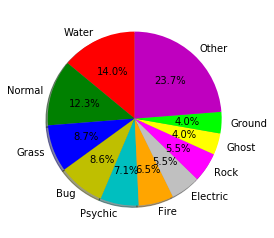

In [6]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Ghost', 'Ground','Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 32,32,190]
colors = ['R', 'G','B','Y', 'C',  'orange', 'silver', '#ff00ff','#ffff00','#00ff00','M']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.plot()
plt.show()

## Type distribution bar chart

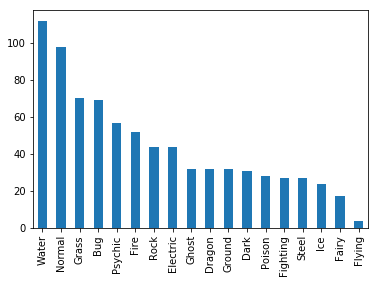

In [7]:
df['TYPE 1'].value_counts().plot.bar()

## Boxplots showing stat ranges

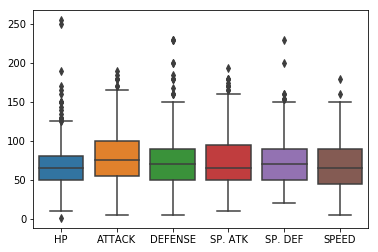

In [8]:
df2=df.drop(['GENERATION','LEGENDARY','TOTAL'],axis=1)
sns.boxplot(data=df2)
plt.show()

## Scatter plot between Total and HP

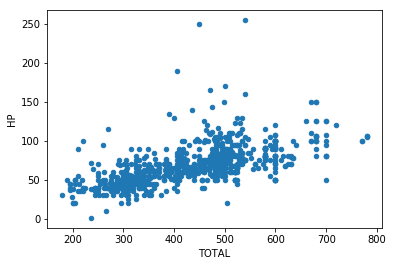

In [9]:
df.plot.scatter(x='TOTAL', y='HP')

## Seaborn scatter plot, same as above

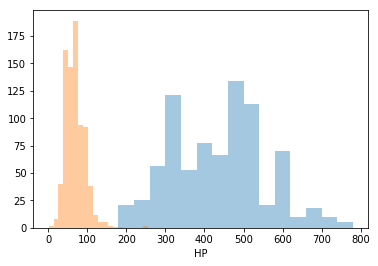

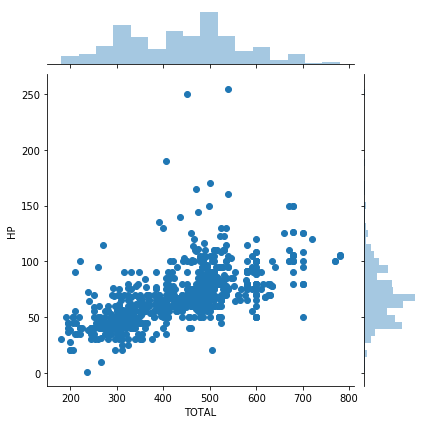

In [10]:
sns.distplot(df['TOTAL'], bins=15, kde=False)

sns.distplot(df['HP'], bins=20, kde=False)

sns.jointplot(x='TOTAL', y='HP', data=df)

## Hex plot between Total and HP

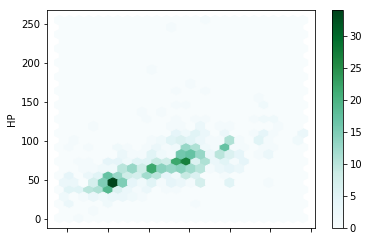

In [11]:
df.plot.hexbin(x='TOTAL', y='HP', gridsize=25)

## Hex plot as above, but with Seaborn

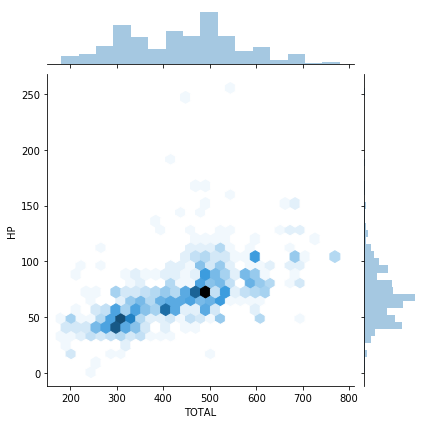

In [12]:
sns.jointplot(x='TOTAL', y='HP', data=df, kind='hex')

## Contour plots

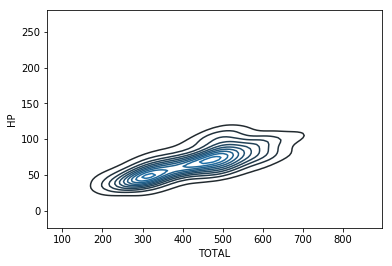

In [13]:
sns.kdeplot(df['TOTAL'], df['HP'])

## Stacked barcharts for legendary and non-legendary Pokemon

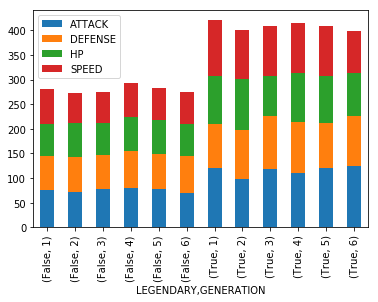

In [14]:
legendary_stats = df.groupby(['LEGENDARY', 'GENERATION']).mean()[['ATTACK', 'DEFENSE','HP','SPEED']]
legendary_stats.plot.bar(stacked=True)

## Average stat variations with generation

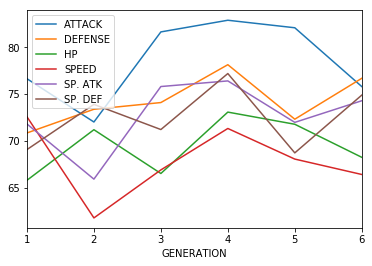

In [15]:
gen_stats = df.groupby('GENERATION').mean()[['ATTACK', 'DEFENSE','HP','SPEED', 'SP. ATK', 'SP. DEF']]
gen_stats.plot.line()

## Boxplots showing attack by type 

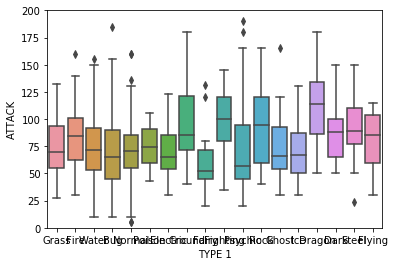

In [16]:
sns.boxplot(x = "TYPE 1", y = "ATTACK",data = df)
plt.ylim(0,200)
plt.show()

## Same data, but with violin plots

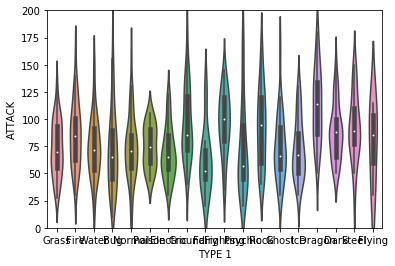

In [17]:
sns.violinplot(x = "TYPE 1", y = "ATTACK",data = df)
plt.ylim(0,200)
plt.show()

## HP distribution

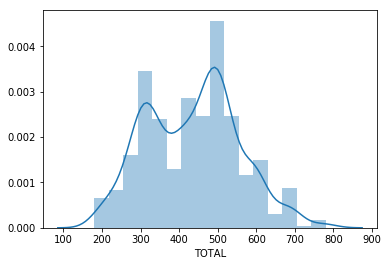

In [18]:
sns.distplot(df['TOTAL'])

## Plot correlation between features

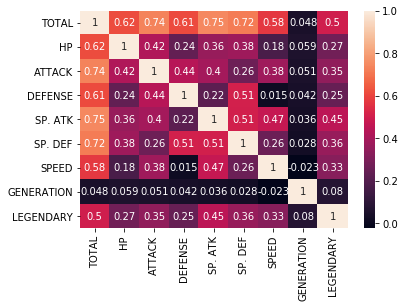

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()